# 1. 기본 세팅

In [3]:
import pandas as pd
import numpy as np

from datetime import date
import warnings
warnings.filterwarnings('ignore')

In [4]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

In [5]:
import folium
import os

In [6]:
df = pd.read_csv('data/reg.csv')
df.head()

FileNotFoundError: File b'data/reg.csv' does not exist

In [ ]:
df_tidy = pd.read_csv('data/reg_tidy.csv')
df_tidy.head()

# 2. 필요한 컬럼과 데이터프레임 만들기

In [ ]:
df['증가율'] = 100 * (df['방영후'] / df['방영전'])
df.head()

In [ ]:
df['방영전_log'] = np.log(df['방영전'])
df['증가율_log'] = np.log(df['증가율'])
df['증가_log'] = np.log(df['증가'])
df.head()

In [ ]:
df1 = df[['방송','식당명','방영전','방영전_log','방영후','증가','증가_log','증가율','증가율_log']]
df1.head()

In [ ]:
mashit_df = df1.loc[df1['방송'] == '맛있는녀석들']
mashit_df.head()

In [ ]:
sangsang_df = df1.loc[df1['방송'] == '생생정보']
sangsang_df.head()

In [ ]:
suyo_df = df1.loc[df1['방송'] == '수요미식회']
suyo_df.head()

In [ ]:
df1.shape

In [ ]:
drop_outlier = df1.loc[(df['방영전'] < 200) & (df['증가'] < 150)]
drop_outlier.head()

# 3. scatter plot

### scatter plot 옵션

function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs

In [7]:
plt.rcParams["font.family"] = 'Noto Sans CJK SC'
plt.rcParams["font.size"] = 12

In [8]:
plt.scatter(df1['방영전'],df1['증가'], color =['red','green','blue'], alpha = 0.3)

NameError: name 'df1' is not defined

NameError: name 'df1' is not defined

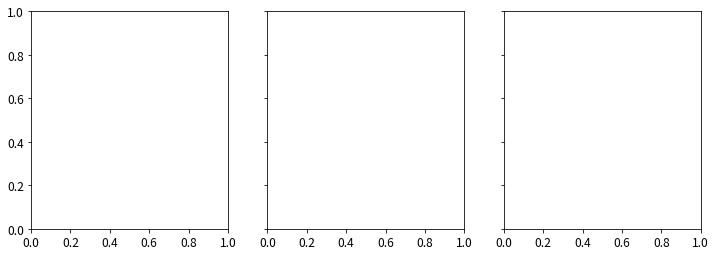

In [9]:
# path = '/Library/Fonts/NotoSansCJKsc-Thin.otf'
# fontprop = fm.FontProperties(fname=fontpath, size=9)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)
for ax, (name, subdf) in zip(axes, df1.groupby(by="방송")):
    subdf.plot.scatter(x="방영전", y="증가", ax=ax)
    
# 맛있는녀석들, 생생정보통, 수요미식회

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)

for ax, (name, subdf) in zip(axes, drop_outlier.groupby(by="방송")):
    subdf.plot.scatter(x="방영전", y="증가", ax=ax)

In [ ]:
plt.scatter(mashit_df['방영전'],mashit_df['증가'], color = 'red')

In [ ]:
plt.scatter(suyo_df['방영전'],suyo_df['증가'], color = 'blue')

In [ ]:
plt.scatter(sangsang_df['방영전'],sangsang_df['증가'], color = 'green')

In [10]:
plt.scatter(df1['방영전'],df1['증가율'])

NameError: name 'df1' is not defined

In [11]:
plt.scatter(df1['방영전'],df1['증가율'])

NameError: name 'df1' is not defined

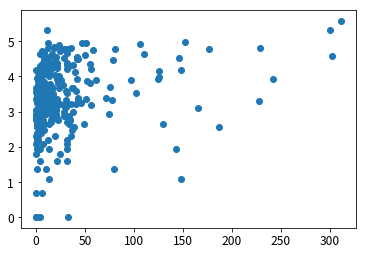

In [23]:
plt.scatter(df1['방영전'],df1['증가_log'])

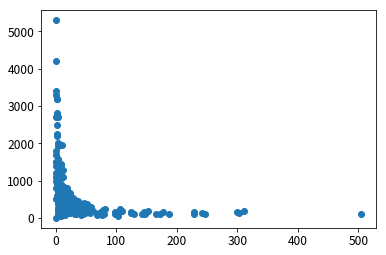

In [24]:
plt.scatter(df1['방영전'],df1['증가율'])

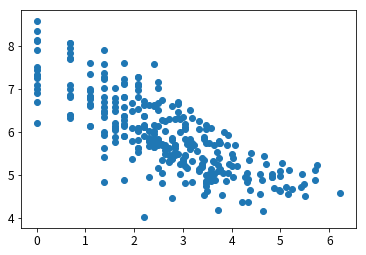

In [25]:
plt.scatter(df1['방영전_log'],df1['증가율_log'])

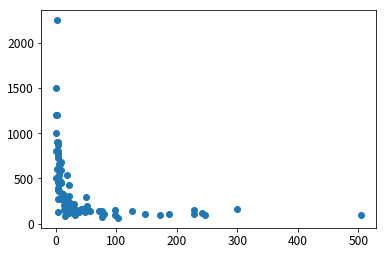

In [26]:
plt.scatter(mashit_df['방영전'],mashit_df['증가율'])

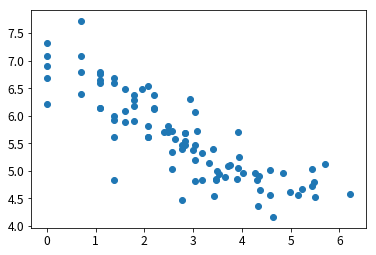

In [27]:
plt.scatter(mashit_df['방영전_log'],mashit_df['증가율_log'])

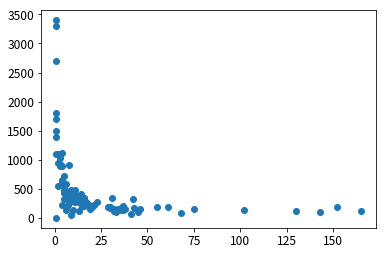

In [28]:
plt.scatter(sangsang_df['방영전'],sangsang_df['증가율'])

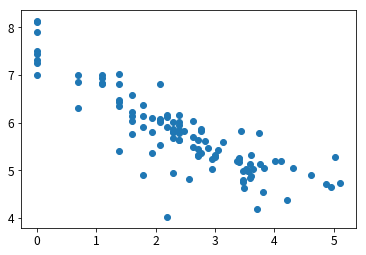

In [29]:
plt.scatter(sangsang_df['방영전_log'],sangsang_df['증가율_log'])

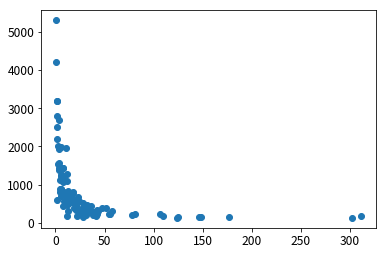

In [30]:
plt.scatter(suyo_df['방영전'],suyo_df['증가율'])

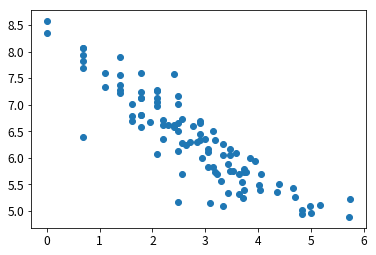

In [31]:
plt.scatter(suyo_df['방영전_log'],suyo_df['증가율_log'])


# 4. 지도 찍어보기

In [35]:
suyo_map = pd.read_csv('data/suyo_map.csv')
mashit_map = pd.read_csv('data/mashit_map.csv')
sangsang_map = pd.read_csv('data/sangsang_map.csv')

mashit_map.head()

,방송명,방송날짜,식당명,주소
0,맛있는 녀석들,2017년 1월 6일,내호냉면,부산시 남구 우암동 189-671
1,맛있는 녀석들,2017년 1월 6일,한방장어구이,부산시 해운대구 중동 1396-59
2,맛있는 녀석들,2017년 1월 13일,김영자 나주곰탕,서울 관악구 신림동 110-6
3,맛있는 녀석들,2017년 1월 13일,강촌원조쭈꾸미,서울 서초구 양재동 11-6
4,맛있는 녀석들,2017년 2월 3일,바다회사랑,서울 마포구 서교동 352-1


In [49]:
df_map = pd.merge(df1, mashit_map, on='식당명')
df_map.head()

,방송,식당명,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log,방송명,방송날짜,주소
0,맛있는녀석들,가람떡갈비,21,3.044522,50,29,3.367296,238.095238,5.472671,맛있는 녀석들,2018년 1월 5일,서울 용산구 한강로 3가 40-441
1,맛있는녀석들,강촌원조쭈꾸미,7,1.945910,46,39,3.663562,657.142857,6.487901,맛있는 녀석들,2017년 1월 13일,서울 서초구 양재동 11-6
2,맛있는녀석들,개미집,13,2.564949,20,7,1.945910,153.846154,5.035953,맛있는 녀석들,2017년 2월 24일,서울 광진구 화양동 508-2
3,맛있는녀석들,개화옥 등심,1,0.000000,8,7,1.945910,800.000000,6.684612,맛있는 녀석들,2017년 7월 21일,서울 강남구 신사동 574-5
4,맛있는녀석들,건대통골뱅이,12,2.484907,36,24,3.178054,300.000000,5.703782,맛있는 녀석들,2017년 4월 7일,서울 강남구 논현동 143-26


In [2]:
pd.to_csv('df_map.csv')

NameError: name 'pd' is not defined